## Get imdb movies into padas database

In [1]:
import pandas as pd
imdb = pd.read_csv('imdb_5000_movies.csv')
imdb.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

### Grab all of the movie codes from the 'imdb_movie_link' column:

In [2]:
imdb_ids = [imdb.iloc[i]['movie_imdb_link'].split('title/')[1].split('/?')[0] for i in range(len(imdb))]

### Insert code into omdb api and turn each one into its own text file

In [4]:
# for id in imdb_ids:

#     request = requests.get(f'http://www.omdbapi.com/?i={id}&plot=full&apikey=82fa3771').json()
#     text = str(request)  
    
#     f = open(f'movie_{id}', 'w+')
#     f.write(text)
#     f.close()

In [3]:
import os
os.getcwd()
# x_file = open(os.path.join('Movies', "movie_tt0378407"), "r")
x_file = open(os.path.join('Movies', "movie_tt1217209"), "r")
movie_text = x_file.readlines()
text = movie_text[0]
eval(text) ##string to dictionary

{'Title': 'Brave',
 'Year': '2012',
 'Rated': 'PG',
 'Released': '22 Jun 2012',
 'Runtime': '93 min',
 'Genre': 'Animation, Adventure, Comedy, Family, Fantasy',
 'Director': 'Mark Andrews, Brenda Chapman, Steve Purcell(co-director)',
 'Writer': 'Brenda Chapman (story by), Mark Andrews (screenplay by), Steve Purcell (screenplay by), Brenda Chapman (screenplay by), Irene Mecchi (screenplay by)',
 'Actors': 'Kelly Macdonald, Billy Connolly, Emma Thompson, Julie Walters',
 'Plot': 'Set in Scotland in a rugged and mythical time, "Brave" features Merida, an aspiring archer and impetuous daughter of royalty. Merida makes a reckless choice that unleashes unintended peril and forces her to spring into action to set things right.',
 'Language': 'English',
 'Country': 'USA, UK',
 'Awards': 'Won 1 Oscar. Another 18 wins & 48 nominations.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMzgwODk3ODA1NF5BMl5BanBnXkFtZTcwNjU3NjQ0Nw@@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Databas

### Create new dataframe with relevant columns

In [4]:
df = pd.DataFrame(columns=['Title', 'Year', 'ID', 'Plot', 'Genre', 'Rated', 'imdbRating'])

In [5]:
for id in imdb_ids:
    import os
    os.getcwd()
    x_file = open(os.path.join('Movies', f"movie_{id}"), "r")    #open up the movie's text file
    movie_text = x_file.readlines()[0]
    dict = eval(movie_text)    #turn string back to dictionary
    dict['Plot'] = dict['Plot'].replace("\'", "'")
    df = df.append({'Title': dict['Title'], 'Year': dict['Year'], 'ID': id, 'Plot': dict['Plot'], 'Genre': dict['Genre'], 'Rated': dict['Rated'], 'imdbRating': dict['imdbRating']}, ignore_index=True)    #add to dataframe

In [6]:
rated_df = df[~((df['Plot'] == 'N/A')|(df['Rated'] == 'N/A')|(df['Rated'] == 'NOT RATED')|(df['Rated'] == 'UNRATED'))]

In [7]:
rated_df['Rated'].unique()
# array(['PG-13' (1466), 'PG' (710), 'G' (129), 'R' (2129), 'TV-14' (36), 'TV-PG' (16), 'TV-MA' (29), 'TV-G' (10), 'TV-Y' (2),
#        'NC-17' (7), 'TV-Y7-FV' (1), 'APPROVED' (24), 'GP' (5), 'M' (4), 'PASSED' (10), 'M/PG' (1), 'X' (1),
#        'NR' (1)], dtype=object)

(rated_df['Rated'] == 'PG-13').sum()

1466

In [7]:
df = df[~((df['Plot'] == 'N/A')|(df['imdbRating'] == 'N/A'))] # Drops movies with null plots
df.imdbRating = df.imdbRating.astype(float)
df['binary_target'] = df['imdbRating'] >= df['imdbRating'].mean()   #binary target column. True = above mean ; False = below mean

In [8]:
df['Plot'][0]
df

,Title,Year,ID,Plot,Genre,imdbRating,binary_target
0,Avatar,2009,tt0499549,"When his brother is killed in a robbery, parap...","Action, Adventure, Fantasy, Sci-Fi",7.8,True
1,Pirates of the Caribbean: At World's End,2007,tt0449088,"After Elizabeth, Will, and Captain Barbossa re...","Action, Adventure, Fantasy",7.1,True
2,Spectre,2015,tt2379713,A cryptic message from the past sends James Bo...,"Action, Adventure, Thriller",6.8,True
3,The Dark Knight Rises,2012,tt1345836,Despite his tarnished reputation after the eve...,"Action, Thriller",8.4,True
5,John Carter,2012,tt0401729,"John Carter, a Civil War veteran, who in 1868 ...","Action, Adventure, Sci-Fi",6.6,True
6,Spider-Man 3,2007,tt0413300,Peter Parker has finally managed to piece toge...,"Action, Adventure, Sci-Fi",6.2,False
7,Tangled,2010,tt0398286,After receiving the healing powers from a magi...,"Animation, Adventure, Comedy, Family, Fantasy,...",7.8,True
8,Avengers: Age of Ultron,2015,tt2395427,Tony Stark creates the Ultron Program to prote...,"Action, Adventure, Sci-Fi",7.4,True
9,Harry Potter and the Half-Blood Prince,2009,tt0417741,In the sixth year at Hogwarts School of Witchc...,"Adventure, Family, Fantasy, Mystery",7.6,True
10,Batman v Superman: Dawn of Justice,2016,tt2975590,The general public is concerned over having Su...,"Action, Adventure, Fantasy, Sci-Fi",6.5,True


In [53]:
from __future__ import print_function
import nltk
import sklearn

from nltk.collocations import *
from nltk import FreqDist, word_tokenize
import string, re
import urllib
from nltk.stem.snowball import SnowballStemmer

In [10]:
import nltk
from nltk.corpus import wordnet

lmtzr = nltk.WordNetLemmatizer().lemmatize


def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def normalize_text(text):
    word_pos = nltk.pos_tag(nltk.word_tokenize(text))
    lemm_words = [lmtzr(sw[0], get_wordnet_pos(sw[1])) for sw in word_pos]

    return [x.lower() for x in lemm_words]

In [11]:
# import pandas and sklearn's CountVectorizer class
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# create a dataframe from a word matrix
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)
  
# set of documents
corpora = [df['Plot'][0], df['Plot'][1]]

# instantiate the vectorizer object
cvec = CountVectorizer(lowercase=False)

# convert the documents into a document-term matrix
wm = cvec.fit_transform(corpora)

# retrieve the terms found in the corpora
tokens = cvec.get_feature_names()

# create a dataframe from the matrix
wm2df(wm, tokens)
tokens

['After',
 'Barbossa',
 'Beckett',
 'Calypso',
 'Captain',
 'Colonel',
 'Company',
 'Cutler',
 'Dalma',
 'Davy',
 'Dutchman',
 'East',
 'Elizabeth',
 'Feng',
 'Flying',
 'In',
 'India',
 'Jack',
 'Jake',
 'Jones',
 'Lord',
 'Lords',
 'Marine',
 'Na',
 'Neytiri',
 'Norrington',
 'Now',
 'Pandora',
 'Parker',
 'Pirate',
 'Pirates',
 'Quaritch',
 'Sao',
 'Selfridge',
 'Sparrow',
 'Sully',
 'The',
 'There',
 'Tia',
 'Trading',
 'When',
 'While',
 'Will',
 'With',
 'against',
 'alien',
 'all',
 'alliance',
 'an',
 'and',
 'attempting',
 'avatar',
 'back',
 'battle',
 'beautiful',
 'begins',
 'bond',
 'bound',
 'brother',
 'by',
 'call',
 'combine',
 'control',
 'cooperating',
 'corners',
 'corporate',
 'crew',
 'damned',
 'dark',
 'dead',
 'decides',
 'distant',
 'driving',
 'entire',
 'epic',
 'exchange',
 'extermination',
 'face',
 'falls',
 'fate',
 'fear',
 'fight',
 'figurehead',
 'final',
 'fix',
 'foes',
 'for',
 'forcing',
 'forms',
 'forward',
 'four',
 'freedom',
 'from',
 'gather

In [12]:
import nltk
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
# word_list = nltk.word_tokenize(sentence)

In [13]:
lemmatized_list2 = []


#
for plot in (df['Plot'][0], df['Plot'][1], df['Plot'][2]):
    reg = re.compile((r"([a-zA-Z]+(?:'[a-z]+)?)"))
    tokenized = reg.findall(df['Plot'][0])
    word_list = [lemmatizer.lemmatize(w) for w in tokenized]
    lemmatized_list2.append(word_list)

In [14]:
lemmatize(word, pos=)


1) lowercase everything
2) tokenize with part of speech
3) for each word, check if stop word. if not, add to string with space between
4) lemmatize with part of speech

SyntaxError: invalid syntax (<ipython-input-14-861d0e8acb32>, line 1)

### Lemmatization Functions 

In [8]:
import nltk
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet
from nltk.corpus import stopwords

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize(plot_list):
    lemmatized_plots = []
    for plot in plot_list:
        tokenized_lower = word_tokenize(plot.lower())   #make plot summary all lowercase and lemmatize
        
        lemmatizer = WordNetLemmatizer()
        
        dirty_lemma = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in tokenized_lower]    #lemmatize each word based on part of speech
        dirty_lemma_string = ' '.join(dirty_lemma)
        
        #filter for words that match regex pattern
        reg = re.compile((r"([a-zA-Z]+(?:'[a-z]+)?)"))    #define regular expression pattern
        lemmatized_regex = [word_lem for word_lem in dirty_lemma if word_lem in reg.findall(dirty_lemma_string)]
        
        #filter out stop words
        stop_words = set(stopwords.words('english'))
        lemmatized = [word_lem for word_lem in lemmatized_regex if not word_lem in stop_words]
        lemmatized_string = ' '.join(lemmatized)
        
        lemmatized_plots.append(lemmatized_string)
        
        
    return lemmatized_plots

In [16]:
all_plots = list(df.loc[:,'Plot'])

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

plots = lemmatize(all_plots)

#term frequency = number of times a word appears in a document / number of words in document
#inverse document frequency = log base e(number of ducuments / number of documents with word in it)
#tf-idf = tf * idf

tfidf = TfidfVectorizer()
response = tfidf.fit_transform(plots)
print(response.shape)

tfidf_df = pd.DataFrame(response.toarray(), columns=tfidf.get_feature_names())

(5037, 22614)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X = tfidf_df
y = df['binary_target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)


clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
from sklearn import metrics

binary_test_predictions = clf.predict(X_test)
print(metrics.classification_report(y_test, binary_test_predictions))

              precision    recall  f1-score   support

       False       0.73      0.22      0.33       241
        True       0.56      0.93      0.70       263

   micro avg       0.59      0.59      0.59       504
   macro avg       0.65      0.57      0.52       504
weighted avg       0.64      0.59      0.53       504



In [20]:
feature_names = tfidf.get_feature_names()

In [53]:
import numpy as np

In [57]:
np.argsort(clf.coef_)

array([[22613, 15688,  5502, ..., 14409,  7346, 11758]])

In [44]:
metrics.accuracy_score(y_test, binary_test_predictions)

0.5873015873015873

In [23]:
x_train_preds = clf.predict(X_train)
print(metrics.classification_report(y_train, x_train_preds))

              precision    recall  f1-score   support

       False       0.99      0.74      0.85      2092
        True       0.81      1.00      0.90      2441

   micro avg       0.88      0.88      0.88      4533
   macro avg       0.90      0.87      0.87      4533
weighted avg       0.90      0.88      0.87      4533



In [45]:
metrics.accuracy_score(y_train, x_train_preds)

0.8757996911537613

In [26]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('clf', MultinomialNB())])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [33]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [36]:
from sklearn.pipeline import make_pipeline
# from sklearn.model_selection 

cross_val_score(pipe, X_train, y_train, cv=5)
y_cv_preds = cross_val_predict(pipe, X_train, y_train, cv=5)

In [38]:
print(metrics.classification_report(y_train, y_cv_preds))

              precision    recall  f1-score   support

       False       0.64      0.20      0.31      2092
        True       0.57      0.90      0.70      2441

   micro avg       0.58      0.58      0.58      4533
   macro avg       0.60      0.55      0.50      4533
weighted avg       0.60      0.58      0.52      4533



### Dimensionality Reduction

In [43]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
svd.fit(X_train)

print(svd.explained_variance_ratio_.sum())

0.11553482251101026


In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [22]:
predictions = rf.predict(X_test)

In [24]:
predictions - y_test

4797    0.6
3241    0.1
2836    0.4
3051   -0.9
3312    0.7
3421   -0.5
241    -0.5
4827   -0.5
2701    0.3
240    -0.4
2333    0.6
66     -0.2
335    -0.6
2346    0.9
1926    0.4
34     -0.1
3246    0.7
2004   -0.4
3098    0.5
3578   -0.6
844     0.2
3614    0.6
1667   -0.1
4189   -0.3
4978    0.4
4617    0.5
917    -0.4
4936   -0.1
3613    0.0
833    -0.6
       ... 
1022   -0.7
110     0.5
2552   -0.6
2830   -0.7
4294    0.2
3732   -0.5
3148   -0.4
4834    0.3
2159   -0.3
713     0.5
1631    0.6
1842   -0.7
850    -0.6
2309   -0.4
4593    0.4
4961    0.8
3522   -0.5
579    -0.5
1636   -0.3
4448    0.3
1628    0.4
2898   -0.5
3607   -0.4
4168   -0.3
2294   -0.4
3984   -0.3
178     0.6
2943   -0.6
2650    0.0
81      0.1
Name: binary_target, Length: 504, dtype: float64

In [25]:
errors = abs(predictions - y_test)
errors

4797    0.6
3241    0.1
2836    0.4
3051    0.9
3312    0.7
3421    0.5
241     0.5
4827    0.5
2701    0.3
240     0.4
2333    0.6
66      0.2
335     0.6
2346    0.9
1926    0.4
34      0.1
3246    0.7
2004    0.4
3098    0.5
3578    0.6
844     0.2
3614    0.6
1667    0.1
4189    0.3
4978    0.4
4617    0.5
917     0.4
4936    0.1
3613    0.0
833     0.6
       ... 
1022    0.7
110     0.5
2552    0.6
2830    0.7
4294    0.2
3732    0.5
3148    0.4
4834    0.3
2159    0.3
713     0.5
1631    0.6
1842    0.7
850     0.6
2309    0.4
4593    0.4
4961    0.8
3522    0.5
579     0.5
1636    0.3
4448    0.3
1628    0.4
2898    0.5
3607    0.4
4168    0.3
2294    0.4
3984    0.3
178     0.6
2943    0.6
2650    0.0
81      0.1
Name: binary_target, Length: 504, dtype: float64

In [29]:
from sklearn.metrics import accuracy_score, roc_curve, auc
accuracy_score(y_test,predictions)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [28]:
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [30]:
y_pred = classifier.predict(X_test)  
acc = accuracy_score(y_test,y_pred) * 100
acc

In [32]:
acc = accuracy_score(y_test,y_pred) * 100
acc

56.34920634920635

### Target as RATED 

,Title,Year,ID,Plot,Genre,Rated,imdbRating
0,Avatar,2009,tt0499549,"When his brother is killed in a robbery, parap...","Action, Adventure, Fantasy, Sci-Fi",PG-13,7.8
1,Pirates of the Caribbean: At World's End,2007,tt0449088,"After Elizabeth, Will, and Captain Barbossa re...","Action, Adventure, Fantasy",PG-13,7.1
2,Spectre,2015,tt2379713,A cryptic message from the past sends James Bo...,"Action, Adventure, Thriller",PG-13,6.8
3,The Dark Knight Rises,2012,tt1345836,Despite his tarnished reputation after the eve...,"Action, Thriller",PG-13,8.4
5,John Carter,2012,tt0401729,"John Carter, a Civil War veteran, who in 1868 ...","Action, Adventure, Sci-Fi",PG-13,6.6
6,Spider-Man 3,2007,tt0413300,Peter Parker has finally managed to piece toge...,"Action, Adventure, Sci-Fi",PG-13,6.2
7,Tangled,2010,tt0398286,After receiving the healing powers from a magi...,"Animation, Adventure, Comedy, Family, Fantasy,...",PG,7.8
8,Avengers: Age of Ultron,2015,tt2395427,Tony Stark creates the Ultron Program to prote...,"Action, Adventure, Sci-Fi",PG-13,7.4
9,Harry Potter and the Half-Blood Prince,2009,tt0417741,In the sixth year at Hogwarts School of Witchc...,"Adventure, Family, Fantasy, Mystery",PG,7.6
10,Batman v Superman: Dawn of Justice,2016,tt2975590,The general public is concerned over having Su...,"Action, Adventure, Fantasy, Sci-Fi",PG-13,6.5


In [9]:
rated_df = df[~((df['Plot'] == 'N/A')|(df['Rated'] == 'N/A')|(df['Rated'] == 'NOT RATED')|(df['Rated'] == 'UNRATED')
               |(df['Rated'] == 'GP')|(df['Rated'] == 'M')|(df['Rated'] == 'PASSED')|(df['Rated'] == 'M/PG')|
               (df['Rated'] == 'X')|(df['Rated'] == 'APPROVED')|(df['Rated'] == 'TV-Y7-FV')|(df['Rated'] == 'NC-17')
               |(df['Rated'] == 'TV-Y')|(df['Rated'] == 'TV-G')|(df['Rated'] == 'TV-PG')|(df['Rated'] == 'TV-14')
               |(df['Rated'] == 'TV-MA')|(df['Rated'] == 'NR'))]
rated_df['Rated'].unique()
# array(['PG-13' (1466), 'PG' (710), 'G' (129), 'R' (2129), 'TV-14' (36), 'TV-PG' (16), 'TV-MA' (29), 'TV-G' (10), 'TV-Y' (2),
#        'NC-17' (7), 'TV-Y7-FV' (1), 'APPROVED' (24), 'GP' (5), 'M' (4), 'PASSED' (10), 'M/PG' (1), 'X' (1),
#        'NR' (1)], dtype=object)

# (rated_df['Rated'] == 'PG-13').sum()

rated_df = rated_df.replace(to_replace='PG-13', value='R')    #discrepency between the two is ambiguous
rated_df = rated_df.replace(to_replace='G', value='PG')     #discrepency between the two is ambiguous
rated_df_targets = list(rated_df['Rated'])

In [10]:
from __future__ import print_function
import nltk
import sklearn

from nltk.collocations import *
from nltk import FreqDist, word_tokenize
import string, re
import urllib
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
all_rated_plots = list(rated_df.loc[:,'Plot'])
plots_rated = lemmatize(all_rated_plots)

#term frequency = number of times a word appears in a document / number of words in document
#inverse document frequency = log base e(number of ducuments / number of documents with word in it)
#tf-idf = tf * idf

tfidf_rated = TfidfVectorizer()
response_rated = tfidf_rated.fit_transform(plots_rated)
print(response_rated.shape)

tfidf_rated_df = pd.DataFrame(response_rated.toarray(), columns=tfidf_rated.get_feature_names())
tfidf_rated_df['Rated'] = rated_df_targets


(4434, 21179)


In [11]:
tfidf_rated_df

,aa,aaa,aaliyah,aames,aang,aaron,aba,aback,abaddon,abagnale,...,zorin,zorro,zuckerberg,zuckerman,zuko,zula,zulffiqar,zulu,zuzu,Rated
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PG
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PG
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R


#### Multinomial Naive Bayes 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X = tfidf_rated_df.iloc[:, :-1]
y = tfidf_rated_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 59, stratify=y)


# clf = MultinomialNB()
# clf.fit(X_train, y_train)

In [51]:
from sklearn import metrics

binary_test_predictions_rated = clf.predict(X_test)
print(metrics.classification_report(y_test, binary_test_predictions_rated))

              precision    recall  f1-score   support

          PG       0.00      0.00      0.00       168
           R       0.81      1.00      0.90       719

   micro avg       0.81      0.81      0.81       887
   macro avg       0.41      0.50      0.45       887
weighted avg       0.66      0.81      0.73       887



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
metrics.accuracy_score(y_test, binary_test_predictions_rated)

0.8105975197294251

In [53]:
binary_test_predictions_rated

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R

In [34]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=800, n_iter=20, random_state=48)
svd.fit(X_train)

print(svd.explained_variance_ratio_.sum())

0.5239738769080848


#### Decision Tree Classifier 

In [54]:
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [55]:
from sklearn.metrics import accuracy_score, roc_curve, auc
# accuracy_score(y_test,predictions)
y_pred = classifier.predict(X_test)  
acc = accuracy_score(y_test,y_pred) * 100
acc

78.01578354002254

In [56]:
# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :78.01578354002254

Confusion Matrix
----------------


Predicted,PG,R,All
True,,,
PG,59,109,168
R,86,633,719
All,145,742,887


In [57]:
rated_df['Rated'].value_counts()

R     3595
PG     839
Name: Rated, dtype: int64

In [68]:
# y_pred

In [ ]:
DecisionTreeClassifier

In [15]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth': [3, 5, 10, 30, 50], 'max_features': [2, 4, 8, 15]}]

forest_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [3, 5, 10, 30, 50], 'max_features': [2, 4, 8, 15]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [16]:
grid_search.best_params_

{'max_depth': 30, 'max_features': 8}

In [28]:
tree_clf = DecisionTreeClassifier(max_depth=30, max_features=15)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

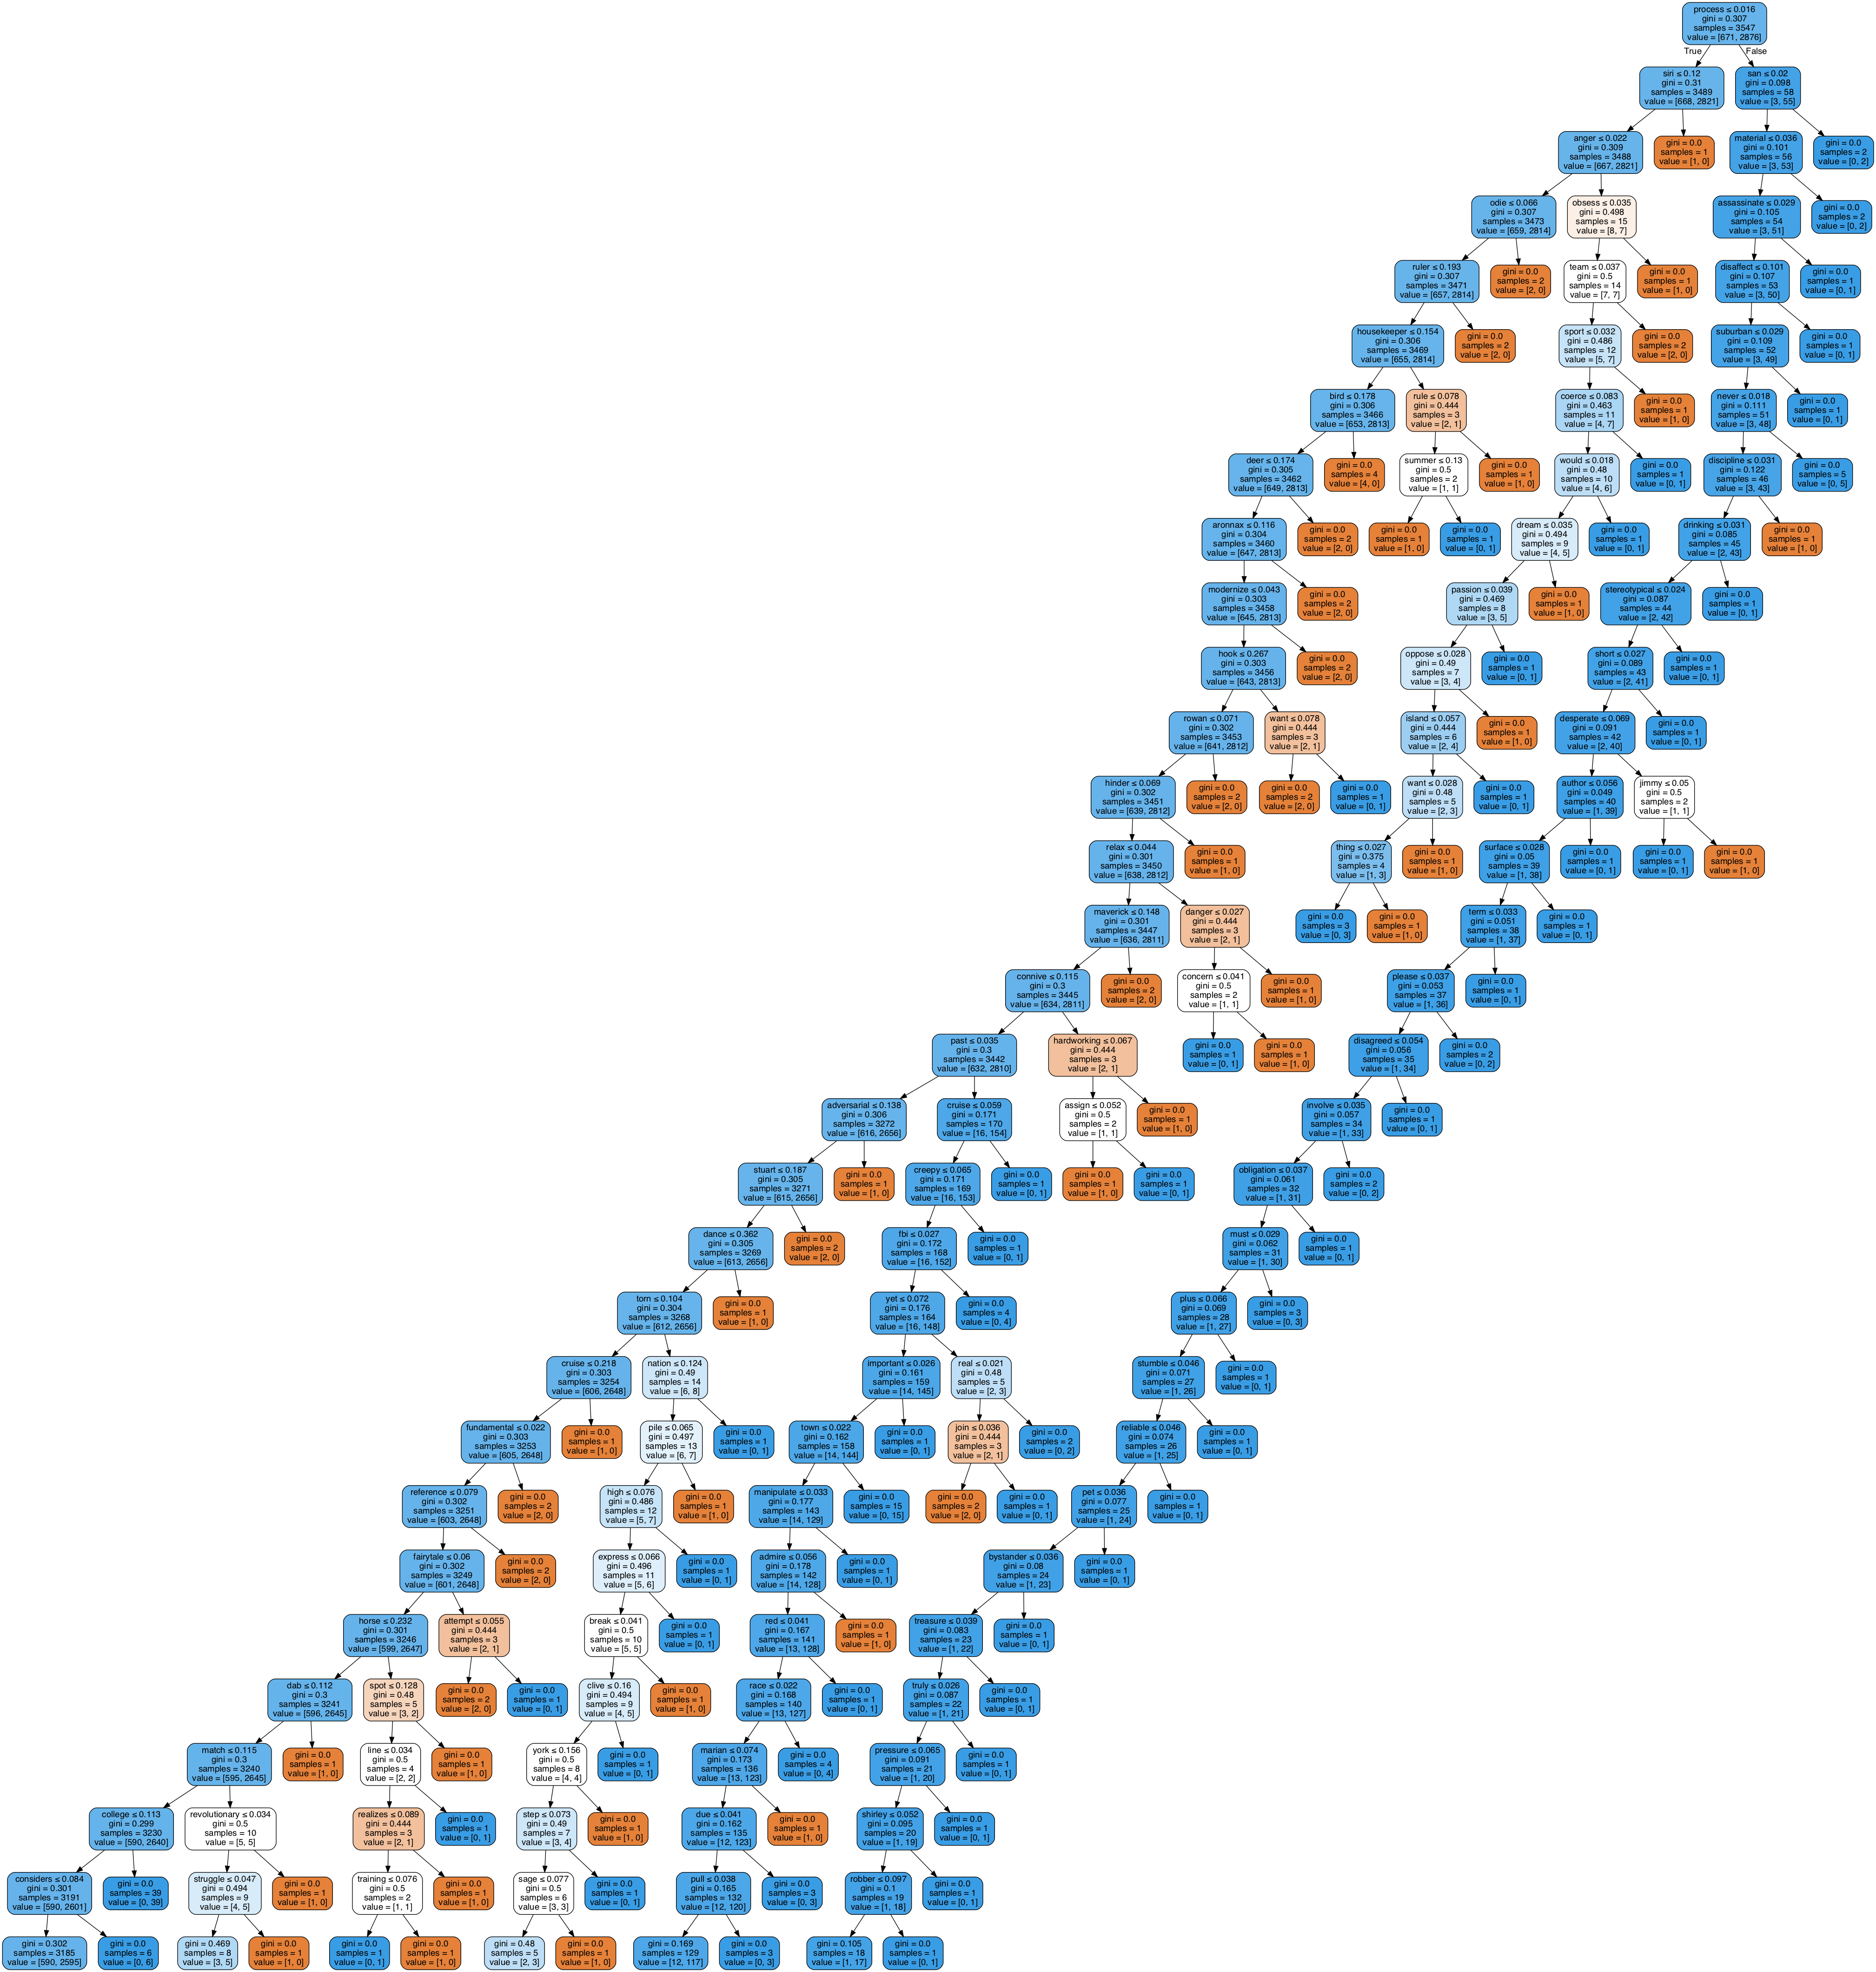

In [29]:
from sklearn.tree import export_graphviz
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pandas as pd 
import numpy as np

# export_graphviz(tree_clf,
#                feature_names=X.columns,
#                class_names=['PG', 'R'],
#                )

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, filled=True, rounded=True,special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [30]:
# Calculate Accuracy 
from sklearn.metrics import accuracy_score, roc_curve, auc

y_pred = tree_clf.predict(X_test)

acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :81.05975197294251

Confusion Matrix
----------------


Predicted,PG,R,All
True,,,
PG,7,161,168
R,7,712,719
All,14,873,887


In [33]:
sum(y_pred == 'PG')

14

In [32]:
sum(y_test == 'PG')

168